# FFT tutorial using numpy

[scipy doc](https://docs.scipy.org/doc/numpy/reference/routines.fft.html)

In [1]:
# general libs we'll use
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## generate a signal that we can use

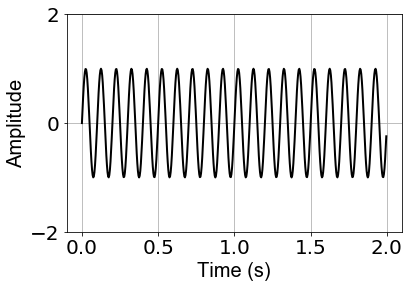

In [8]:
sr = 256                        # samp rate in Hz
f = 10                          # frequency of signal 
tmax = 2                        # duration of signal, in s
dt = 1/sr                       # time step, reciprocal of the sr
t = np.arange(0,tmax,dt)        # time axis

# make a sin wave
sw = np.sin(2*pi*f*t)

plt.plot(t, sw, 'k-', linewidth = 2)    # specify x,y data...convert rad to deg for x-axis

plt.xlabel('Time (s)', **fig_font)
plt.ylabel('Amplitude', **fig_font)

plt.xticks(np.arange(0,tmax+.5,.5), color='k', size=20)

plt.yticks((-2,0,2), color='k', size=20)

# grid?
plt.grid(1)

# show it
plt.show()

## do the fft and plot
[legend help page](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)

In [17]:
# use the numpy fft function 
sp = np.fft.rfft(sw)      # rfft = fft for real valued inputs

# normalize by the number of data points
amp = (np.abs(sp)  / len(sw) ) * 2   

# note that power, which you sometimes see, is amp**2
# pwr = amp**2

In [22]:
# figure out the frequency resolution of the data 

# frequency resolution is dependent on how long your signal is...
freq_steps = 1/tmax

# of call this built in function. 
freq = np.fft.rfftfreq(sw.size, dt)   # Sample spacing is 2nd arg, inverse of the sampling rate. Defaults to 1!

print('Freq steps computed by hand: ', freq_steps, ' And computed using built-in: ', freq[1]-freq[0])

Freq steps computed by hand:  0.5  And computed using built-in:  0.5


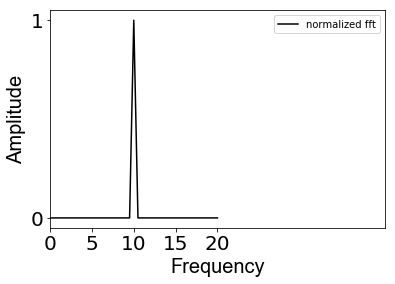

In [23]:
# plot the results!
plt.plot(freq, amp, 'k')            # plot amplitude 
plt.legend(['normalized fft'], loc='best', fancybox=1)  
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.xticks(freq[0:80:10], color='k', size=20)
plt.yticks((0,1), color='k', size=20)
plt.xlim([0, 40])
plt.show()

## more interesting input...

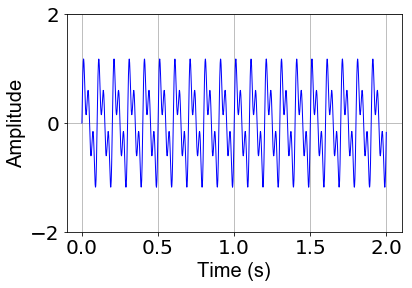

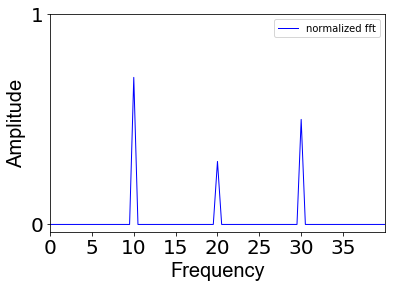

In [5]:
# make a new signal to FFT...combo of sin waves
sr = 1024                       # samp rate in Hz
f = np.array([10,20,30])     # frequency of signal 
amp = np.array([.7,.3,.5])
tmax = 2                        # duration of signal, in s
dt = 1/sr                       # time step, reciprocal of the sr
t = np.arange(0,tmax,dt)        # time axis

# make a more complex sin wave
sw = amp[0]*np.sin(2*pi*f[0]*t)+amp[1]*np.sin(2*pi*f[1]*t)+amp[2]*np.sin(2*pi*f[2]*t)

# plot the signal...
plt.plot(t, sw, 'b-', linewidth = 1)    
plt.xlabel('Time (s)', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.xticks(np.arange(0,tmax+.5,.5), color='k', size=20)
plt.yticks((-2,0,2), color='k', size=20)
plt.grid(1)
plt.show()

sp = np.fft.rfft(sw)                  # normalize by the number of data points
amp = (np.abs(sp) / len(sw)) *2
freq = np.fft.rfftfreq(sw.size, dt)   # Sample spacing is 2nd arg, inverse of the sampling rate. Defaults to 1!
plt.plot(freq, amp, 'b', linewidth=1) # plot amplitude (power = np.absolute(sp)**2)
plt.legend(['normalized fft'], loc='best', fancybox=1)  
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.xticks(freq[0:80:10], color='k', size=20)
plt.yticks((0,1), color='k', size=20)
plt.xlim([0, 40])
plt.show()

## What limits the resolution of your measurements in the frequency domain? I.e. the spacing along the x-axis? Remember that the freq. resolution is SR/N (sample rate / Number of samples)...so while most people would guess that increasing the sample rate will increase the temporal resolution, it does not! We have SR/N = SR/(SR * T) =  1/T...so frequency resolution is ONLY dependent on the duration of data collection

## However, there are some advantages of collecting data at a higher sample rate. First, it increases the range of frequencies that you can estimate, and second you have more stable estimates of the amplitude at each frequency. 

## To understand why this is, we can talk about the Nyquist limit...
N=fs/dF where dF is the desired frequency interval

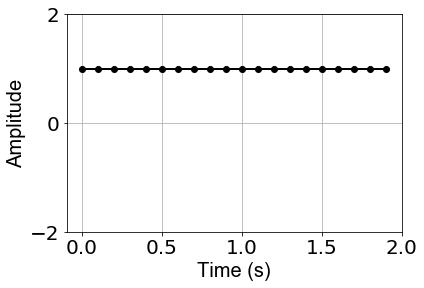

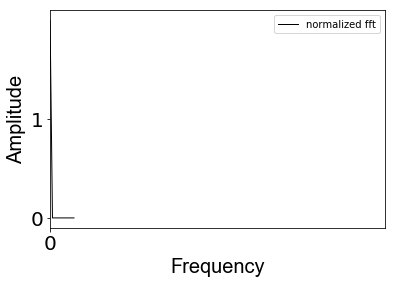

In [40]:
# watch what happens to the data as sr changes and where its sampled and also the x-axis on the freq plots
sr = 10                         # samp rate in Hz
f = 10                          # frequency of signal 
tmax = 2                        # duration of signal, in s
dt = 1/sr                       # time step, reciprocal of the sr
t = np.arange(0,tmax,dt)        # time axis

# make a cos wave
sw = np.cos(2*pi*f*t)

plt.plot(t, sw, 'ko-', linewidth = 2)    # specify x,y data...convert rad to deg for x-axis
plt.xlabel('Time (s)', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.xticks(np.arange(0,tmax+.5,.5), color='k', size=20)
plt.yticks((-2,0,2), color='k', size=20)
plt.grid(1)
plt.show()

# FFT
sp = np.fft.rfft(sw)                  # fft
amp = (np.abs(sp) / len(sw)) * 2      # normalize by the number of data points
freq = np.fft.rfftfreq(sw.size, dt)   # Sample spacing is 2nd arg, inverse of the sampling rate. Defaults to 1!
plt.plot(freq, amp, 'k', linewidth=1)            # plot amplitude (power = np.absolute(sp)**2)
plt.legend(['normalized fft'], loc='best', fancybox=1)  
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.xticks(freq[0::20], color='k', size=20)
plt.yticks((0,1), color='k', size=20)
plt.xlim([0, 70])
plt.show()

## Point number 2: here pick a fixed temporal interval and a fixed noise level and look at variability of amplitude estimates as a function of sampling rate. Note again that frequency resolution does not change as a function of sample rate (just the max freq that can be estimated changes). However, even though freq resolution doesn't change as samp rate gets higher you will be better able to more reliably  recover the amplitude of an oscillation in the presence of noise. You can think about this as a curve fitting problem - the more points you have to fit the more stable your fit is going to be...and if you're right at the minimum sample rate to estimate a frequency you're only going to get stable estimates if your signal has no noise. 

Frequency resolution at each samp rate:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5]


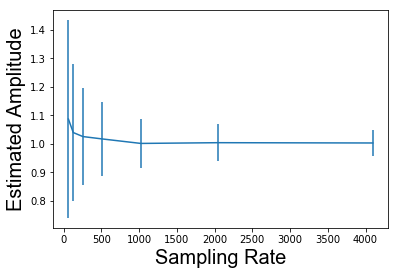

In [41]:
sr = np.array([64, 128, 256, 512, 1024, 2048, 4096])  # samp rate in Hz
f = 24                          # frequency of signal 
tmax = 2                        # duration of signal, in s
dt = 1/sr                       # time step, reciprocal of the sr
noise_amp = 10                  # amplitude of additive IID noise (this is actually 2*amp of noise)
num_iterations = 500            # how many times to loop to eval impact of noise as a function of 

# little note on frequency resolution - function of number of data samples and sample rate
num_data_samps = sr * tmax      # just samp rate * how many seconds of data
# freq resolution...note that the ONLY thing that increases freq resolution is more time!
# for a fixed amount of time the increase in sr and the length of data scale proportionally. 
fstepSz = sr / num_data_samps   
print('Frequency resolution at each samp rate: ', fstepSz)

# allocate arrray to store amp at target frequency f
amp = np.zeros((num_iterations,len(sr)))

# loop over iterations to get an estimate of variaiblity of amp estimates at a given noise level. 
for j in range(num_iterations):
    
    # then loop over sample rates...
    for i in range(len(sr)):
        t = np.arange(0,tmax,dt[i])        # time axis

        # make a sin wave
        sw = np.sin(2*pi*f*t) 

        # add some noise. 
        sw = sw + (np.random.rand((len(sw))) - .5) * noise_amp

        # FFT, with * dt to normalize the amplitude for number of samples in timeseries  
        # sp = np.fft.rfft(sw) * dt[i]     
        sp = (np.abs(np.fft.rfft(sw)) / len(sw)) * 2

        # get your freq axis
        freq = np.fft.rfftfreq(sw.size, dt[i])        

        # find the nearest value to your target frequency (in this first example it should always be spot on)
        ind = np.argmin(np.abs(f-freq))

        amp[j,i] = sp[ind]

mean_amp = np.mean(amp,0)
std_amp = np.std(amp,0)
plt.errorbar(sr, mean_amp, std_amp)
plt.xlabel('Sampling Rate', **fig_font)
plt.ylabel('Estimated Amplitude', **fig_font)
plt.show()

## Importance of accuractely epoching your data - now fix a length of data and vary sample rate...try changing the duration of data collection (tmax) from 2 to something weird like 2.56 or something...notice how the amp goes down with 2.56 even though you have more data! why? Now try fixing the duration (tmax) at 2s but change the frequ (f) to something like 24.22...what happens now? 

Freq resolution:  0.5


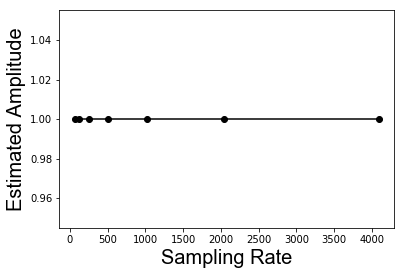

In [49]:
sr = np.array([64, 128, 256, 512, 1024, 2048, 4096])  # samp rate in Hz
f = 24                          # frequency of signal 
tmax = 2                        # duration of signal, in s
dt = 1/sr                       # time step, reciprocal of the sr
noise_amp = 0                   # amplitude of additive IID noise (this is actually 2*amp of noise)
num_iterations = 250            # how many times to loop to eval impact of noise as a function of 

# allocate arrray to store amp at target frequency f
amp = np.zeros(len(sr))

# loop over sample rates...
for i in range(len(sr)):
    t = np.arange(0,tmax,dt[i])        # time axis

    # make a sin wave
    sw = np.sin(2*pi*f*t) 
    
    # add some noise. 
    sw = sw + (np.random.rand((len(sw))) - .5) * noise_amp
    
    # FFT, with * dt to normalize the amplitude for number of samples in timeseries  
    # sp = np.fft.rfft(sw) * dt[i]     
    sp = (np.abs(np.fft.rfft(sw)) / len(sw)) * 2

    # get your freq axis
    freq = np.fft.rfftfreq(sw.size, dt[i])        

    # find the nearest value to your target frequency
    ind = np.argmin(np.abs(f-freq))

    amp[i] = sp[ind]

print('Freq resolution: ', freq[1]-freq[0])
plt.plot(sr, amp, 'ko-')
plt.xlabel('Sampling Rate', **fig_font)
plt.ylabel('Estimated Amplitude', **fig_font)
plt.show()